In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

C:\Users\Time\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [4]:
print(X_train.shape)        # (number of samples,each indicidual image,each individual image)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train[0].shape        # grid of 28x28 => 784 features

(28, 28)

In [7]:
X_train[0]      # values ranging from 0-255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

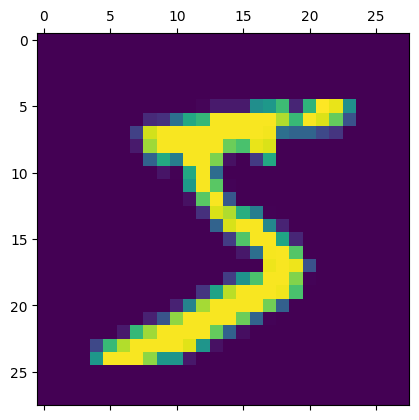

In [8]:
plt.matshow(X_train[0])     # display matrix

In [10]:
y_train[0]      # the output for above number is 5

5

In [12]:
# reshape to (60000,784)        also no need to flatten y as it is already a 1D array
X_train_flattened = X_train.reshape(len(X_train),28*28)     
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [13]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
# create a neural network model
model = keras.Sequential([       # it means that you're having a stack of layers in the neural network => so accept every layer as one element
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')        # (output_shape,input_shape)
])     

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',      # loss function such as mean_squared_error
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)   # epochs is the number of iterations for which your neural network is going to train

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7236 - accuracy: 0.8402
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0696 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6367 - accuracy: 0.8825
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5452 - accuracy: 0.8837
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4311 - accuracy: 0.8870


In [21]:
# as the time goes, the accuracy will increase  => this accuracy is actually the training accuracy

In [17]:
# also to increase the accuracy, you can scale the dataset
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [22]:
X_train_scaled_flattened = X_train_scaled.reshape(len(X_train_scaled),28*28)     
X_test_scaled_flattened = X_test_scaled.reshape(len(X_test_scaled),28*28)

In [23]:
model.fit(X_train_scaled_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3112 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2862 - accuracy: 0.9194
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9231
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2655 - accuracy: 0.9251
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2603 - accuracy: 0.9267


In [24]:
model.evaluate(X_test_scaled_flattened,y_test)      # [loss,accuracy]

313/313 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.9236


[0.26873645186424255, 0.9236000180244446]

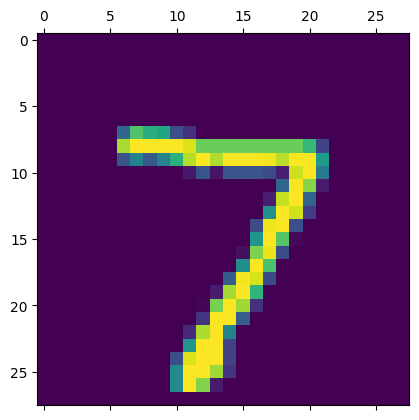

In [25]:
plt.matshow(X_test[0])

In [26]:
y_pred = model.predict(X_test_scaled_flattened)

313/313 [==============================] - 1s 2ms/step


In [27]:
y_pred[0]       # gives value between 0 to 1 => predicted scores for each digit

array([2.0088188e-03, 1.4249622e-07, 1.6311765e-02, 9.6845210e-01,
       4.8422450e-03, 1.3103296e-01, 2.0320229e-08, 9.9984229e-01,
       7.0551686e-02, 7.5334156e-01], dtype=float32)

In [29]:
np.argmax(y_pred[0])    # prints the maximum value => value with maximum score

7

In [30]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 4,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 3,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   8,   10,  921,   20,    8,    4,   13,   10,   33,    5],
       [   2,    1,   18,  936,    1,   17,    3,   11,   12,    9],
       [   1,    1,    2,    1,  920,    0,   12,    4,    5,   36],
       [   8,    3,    1,   41,   11,  771,   17,    8,   26,    6],
       [  10,    3,    2,    2,    7,   12,  918,    2,    2,    0],
       [   1,    7,   19,   11,   10,    0,    0,  946,    2,   32],
       [   9,   16,    6,   40,   10,   31,   11,   13,  827,   11],
       [  11,    7,    1,   14,   29,    6,    0,   23,    2,  916]])>

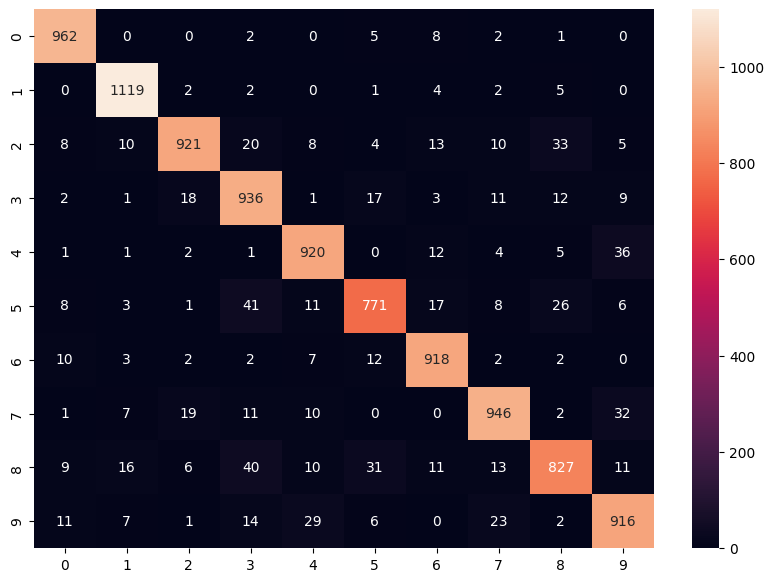

In [32]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel='Predicted'
plt.ylabel='Actual'

# Add Hidden Layer

In [33]:
model1 = keras.Sequential([      
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),    # specify number of neurons in the hidden layer
    keras.layers.Dense(10, activation='sigmoid')                        # no need to specify input_shape => gets it from the first layer
    # so output neurons for input layer is the number of neurons in the hidden layer and input neurons for output layer are taken automatically
    # more than one hidden layers can also be added
])     

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   
    metrics=['accuracy']
)

model1.fit(X_train_flattened,y_train,epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4209 - accuracy: 0.8458
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4082 - accuracy: 0.9029
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2963 - accuracy: 0.9246
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2539 - accuracy: 0.9356
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2272 - accuracy: 0.9412


In [34]:
model1.evaluate(X_test_scaled_flattened,y_test)      # [loss,accuracy]

313/313 [==============================] - 1s 3ms/step - loss: 2.3015 - accuracy: 0.0975


[2.301520586013794, 0.09749999642372131]

In [35]:
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   8,   10,  921,   20,    8,    4,   13,   10,   33,    5],
       [   2,    1,   18,  936,    1,   17,    3,   11,   12,    9],
       [   1,    1,    2,    1,  920,    0,   12,    4,    5,   36],
       [   8,    3,    1,   41,   11,  771,   17,    8,   26,    6],
       [  10,    3,    2,    2,    7,   12,  918,    2,    2,    0],
       [   1,    7,   19,   11,   10,    0,    0,  946,    2,   32],
       [   9,   16,    6,   40,   10,   31,   11,   13,  827,   11],
       [  11,    7,    1,   14,   29,    6,    0,   23,    2,  916]])>

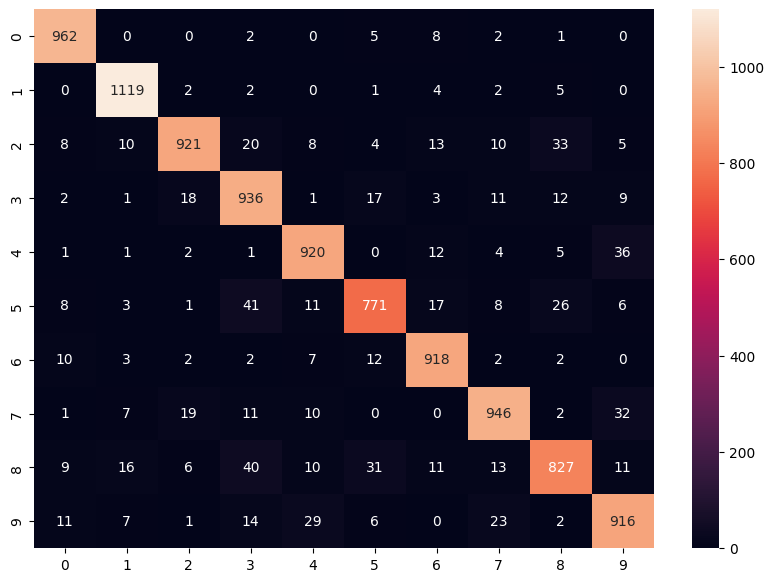

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel='Predicted'
plt.ylabel='Actual'

In [37]:
# if you don't want to explicitly flatten the array, use keras which has an extra layer for flattening purpose

model2 = keras.Sequential([   
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),   # no need to specify the input shape again
    keras.layers.Dense(10, activation='sigmoid')                
])     

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   
    metrics=['accuracy']
)

model2.fit(X_train,y_train,epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.7434 - accuracy: 0.8223
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4412 - accuracy: 0.8903
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3176 - accuracy: 0.9168
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2714 - accuracy: 0.9292
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2531 - accuracy: 0.9336
